In [1]:
import pandas as pd
from folium.plugins import HeatMap
import folium
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
import os 
filepath = os.path.join(os.getcwd(), 'dataset_tratado.csv')

In [3]:
df_completo = pd.read_csv(filepath, engine='python', 
                     on_bad_lines='warn', header=0, sep = ",")

In [4]:
df_completo.keys()

Index(['ANO_INGRESSO', 'SEMESTRE_INGRESSO', 'TIPO_INGRESSO', 'COTA',
       'CURSO_NOME', 'AREA', 'SITUACAO', 'MOTIVO_SAIDA', 'CAMPUS', 'TURNO',
       'ETNIA', 'SEXO', 'TIPOCURSO', 'LNG', 'LAT', 'LOCAL', 'LNG_ORGM',
       'LAT_ORGM', 'LOCAL_ORGM', 'Baixa renda', 'Escola pública', 'Etnia PPI',
       'PCD', 'Estado'],
      dtype='object')

In [5]:
df_completo.head()

,ANO_INGRESSO,SEMESTRE_INGRESSO,TIPO_INGRESSO,COTA,CURSO_NOME,AREA,SITUACAO,MOTIVO_SAIDA,CAMPUS,TURNO,...,LAT,LOCAL,LNG_ORGM,LAT_ORGM,LOCAL_ORGM,Baixa renda,Escola pública,Etnia PPI,PCD,Estado
0,2008.0,1.0,Transferência Obrigatória,NaN,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,-21.753129,"VALE DO IPE, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN,Não,Não,Não,Não,NaN
1,2008.0,1.0,VESTIBULAR,Grupo B,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,-21.804313,"PARQUE JARDIM DA SERRA, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN,Sim,Sim,Não,Não,NaN
2,2008.0,1.0,PISM,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,Abandono,JUIZ DE FORA,INTEGRAL,...,-21.750069,"SANTA CATARINA, JUIZ DE FORA, MG, BRASIL",NaN,NaN,NaN,Não,Não,Não,Não,NaN
3,2008.0,1.0,VESTIBULAR,Grupo C,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Concluido,Conclusão,JUIZ DE FORA,INTEGRAL,...,-21.718564,"ANDRELANDIA, MG, BRASIL",NaN,NaN,NaN,Não,Não,Não,Não,NaN
4,2008.0,1.0,VESTIBULAR,Grupo B,CIÊNCIAS BIOLÓGICAS,Ciências Biológicas,Evadido,A Especificar,JUIZ DE FORA,INTEGRAL,...,-20.850899,"PAULA CANDIDO, MG, BRASIL",NaN,NaN,NaN,Sim,Sim,Não,Não,NaN


In [13]:
df_evadidos = df_completo[df_completo['SITUACAO'] == 'Evadido']

In [35]:
# Use groupby para agrupar os dados por 'estado' e aplique a função count() para contar as linhas por estado
evadidos_por_ano = df_evadidos.groupby('ANO_INGRESSO').size().reset_index(name='Número de alunos evadidos')

In [15]:
# Código para excluir as linhas que não quero que entre análise
indices_para_remover = [13, 14, 15]

evadidos_por_ano = evadidos_por_ano.drop(indices_para_remover)

Coeficiente 'a': 49.35714285714286
Coeficiente 'b': -98259.90109890111


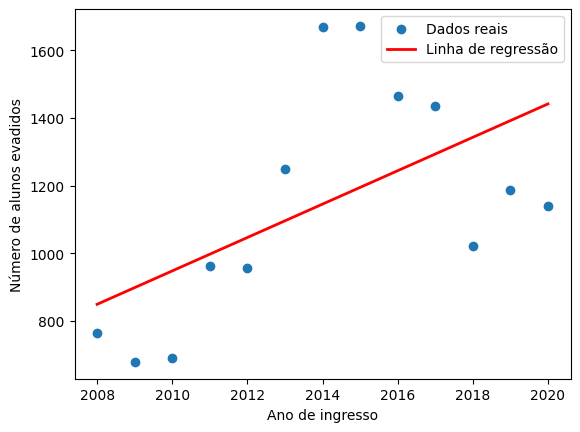

In [16]:
# Separar as variáveis independentes (x) e dependentes (y)
x = evadidos_por_ano['ANO_INGRESSO'].values.reshape(-1, 1)
y = evadidos_por_ano['Número de alunos evadidos'].values

# Inicializar o modelo de regressão linear
regressor = LinearRegression()

# Ajustar o modelo aos dados
regressor.fit(x, y)

# Obter e imprimir os coeficientes 'a' e 'b'
a = regressor.coef_[0]
b = regressor.intercept_
print(f"Coeficiente 'a': {a}")
print(f"Coeficiente 'b': {b}")

# Fazer previsões com o modelo ajustado
y_pred = regressor.predict(x)

# Plotar os dados e a linha de regressão
plt.scatter(x, y, label='Dados reais')
plt.plot(x, y_pred, color='red', linewidth=2, label='Linha de regressão')
plt.xlabel('Ano de ingresso')
plt.ylabel('Número de alunos evadidos')
plt.legend()
plt.show()

Período até 2012 - Coeficiente 'a': 66.69999999999999, Coeficiente 'b': -133256.79999999996
Período após 2012 - Coeficiente 'a': -61.36904761904765, Coeficiente 'b': 125105.55952380958


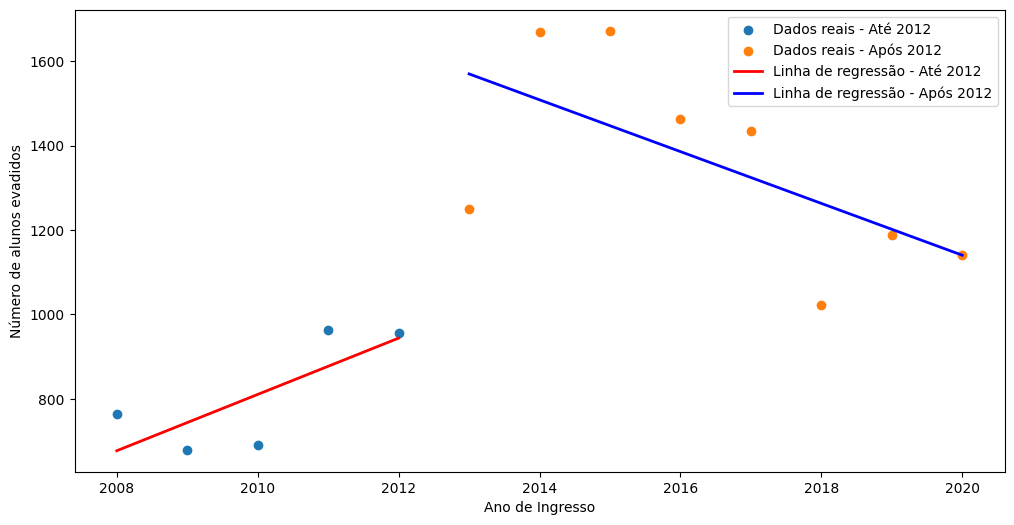

In [17]:
# Dividir os dados em dois períodos: até 2012 e após 2012
periodo_ate_2012 = evadidos_por_ano[evadidos_por_ano['ANO_INGRESSO'] <= 2012]
periodo_apos_2012 = evadidos_por_ano[evadidos_por_ano['ANO_INGRESSO'] > 2012]

# Separar as variáveis independentes (x) e dependentes (y) para cada período
x_ate_2012 = periodo_ate_2012['ANO_INGRESSO'].values.reshape(-1, 1)
y_ate_2012 = periodo_ate_2012['Número de alunos evadidos'].values

x_apos_2012 = periodo_apos_2012['ANO_INGRESSO'].values.reshape(-1, 1)
y_apos_2012 = periodo_apos_2012['Número de alunos evadidos'].values

# Inicializar e ajustar o modelo de regressão linear para os dois períodos
regressor_ate_2012 = LinearRegression()
regressor_ate_2012.fit(x_ate_2012, y_ate_2012)

regressor_apos_2012 = LinearRegression()
regressor_apos_2012.fit(x_apos_2012, y_apos_2012)

# Obter os coeficientes 'a' e 'b' para cada período
a_ate_2012 = regressor_ate_2012.coef_[0]
b_ate_2012 = regressor_ate_2012.intercept_

a_apos_2012 = regressor_apos_2012.coef_[0]
b_apos_2012 = regressor_apos_2012.intercept_

print(f"Período até 2012 - Coeficiente 'a': {a_ate_2012}, Coeficiente 'b': {b_ate_2012}")
print(f"Período após 2012 - Coeficiente 'a': {a_apos_2012}, Coeficiente 'b': {b_apos_2012}")

# Fazer previsões com os modelos ajustados para cada período
y_pred_ate_2012 = regressor_ate_2012.predict(x_ate_2012)
y_pred_apos_2012 = regressor_apos_2012.predict(x_apos_2012)

# Plotar os dados e as linhas de regressão para cada período
plt.figure(figsize=(12, 6))
plt.scatter(x_ate_2012, y_ate_2012, label='Dados reais - Até 2012')
plt.scatter(x_apos_2012, y_apos_2012, label='Dados reais - Após 2012')
plt.plot(x_ate_2012, y_pred_ate_2012, color='red', linewidth=2, label='Linha de regressão - Até 2012')
plt.plot(x_apos_2012, y_pred_apos_2012, color='blue', linewidth=2, label='Linha de regressão - Após 2012')
plt.xlabel('Ano de Ingresso')
plt.ylabel('Número de alunos evadidos')
plt.legend()
plt.show()

In [18]:
#Análise R².  
score = regressor_ate_2012.score(x_ate_2012, y_ate_2012)
print(score)

0.5696635457534829


In [19]:
#Análise R².  
score = regressor_apos_2012.score(x_apos_2012, y_apos_2012)
print(score)

0.382309799578994


In [20]:
import statsmodels.api as sm

In [21]:
# Crie e ajuste o modelo de regressão para o período até 2012
modelo_ate_2012 = sm.OLS(y_ate_2012, sm.add_constant(x_ate_2012)).fit()

# Obtenha o resumo do modelo que inclui os valores p associados aos coeficientes
resumo_ate_2012 = modelo_ate_2012.summary()

# Imprima o resumo no console
print("Resumo para o período até 2012:")
print(resumo_ate_2012)

# Crie e ajuste o modelo de regressão para o período após 2012
modelo_apos_2012 = sm.OLS(y_apos_2012, sm.add_constant(x_apos_2012)).fit()

# Obtenha o resumo do modelo que inclui os valores p associados aos coeficientes
resumo_apos_2012 = modelo_apos_2012.summary()

# Imprima o resumo no console
print("Resumo para o período após 2012:")
print(resumo_apos_2012)

C:\Users\glaucia.cerqueira\bootcamp\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Resumo para o período até 2012:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     3.971
Date:                Thu, 26 Oct 2023   Prob (F-statistic):              0.140
Time:                        16:03:20   Log-Likelihood:                -29.127
No. Observations:                   5   AIC:                             62.25
Df Residuals:                       3   BIC:                             61.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.333e+0

C:\Users\glaucia.cerqueira\bootcamp\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [22]:
evadidos_por_cota = df_evadidos.groupby('COTA').size().reset_index(name='Alunos evadidos por cota')
evadidos_por_cota

,COTA,Alunos evadidos por cota
0,Grupo A,1843
1,Grupo A1,20
2,Grupo B,2183
3,Grupo B - antigo,2
4,Grupo B1,15
5,Grupo C,7748
6,Grupo C - antigo,5
7,Grupo D,1611
8,Grupo D1,29
9,Grupo E,1186


In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [30]:
evadidos_por_curso = df_evadidos.groupby('CURSO_NOME').size().reset_index(name='Total de alunos evadidos')
evadidos_por_ano = df_evadidos.groupby('ANO_INGRESSO').size().reset_index(name='Ano de ingresso')

C:\Users\glaucia.cerqueira\AppData\Local\Temp\ipykernel_3616\920681198.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=evadidos_por_curso, x="CURSO_NOME", y="Total de alunos evadidos", palette="deep")


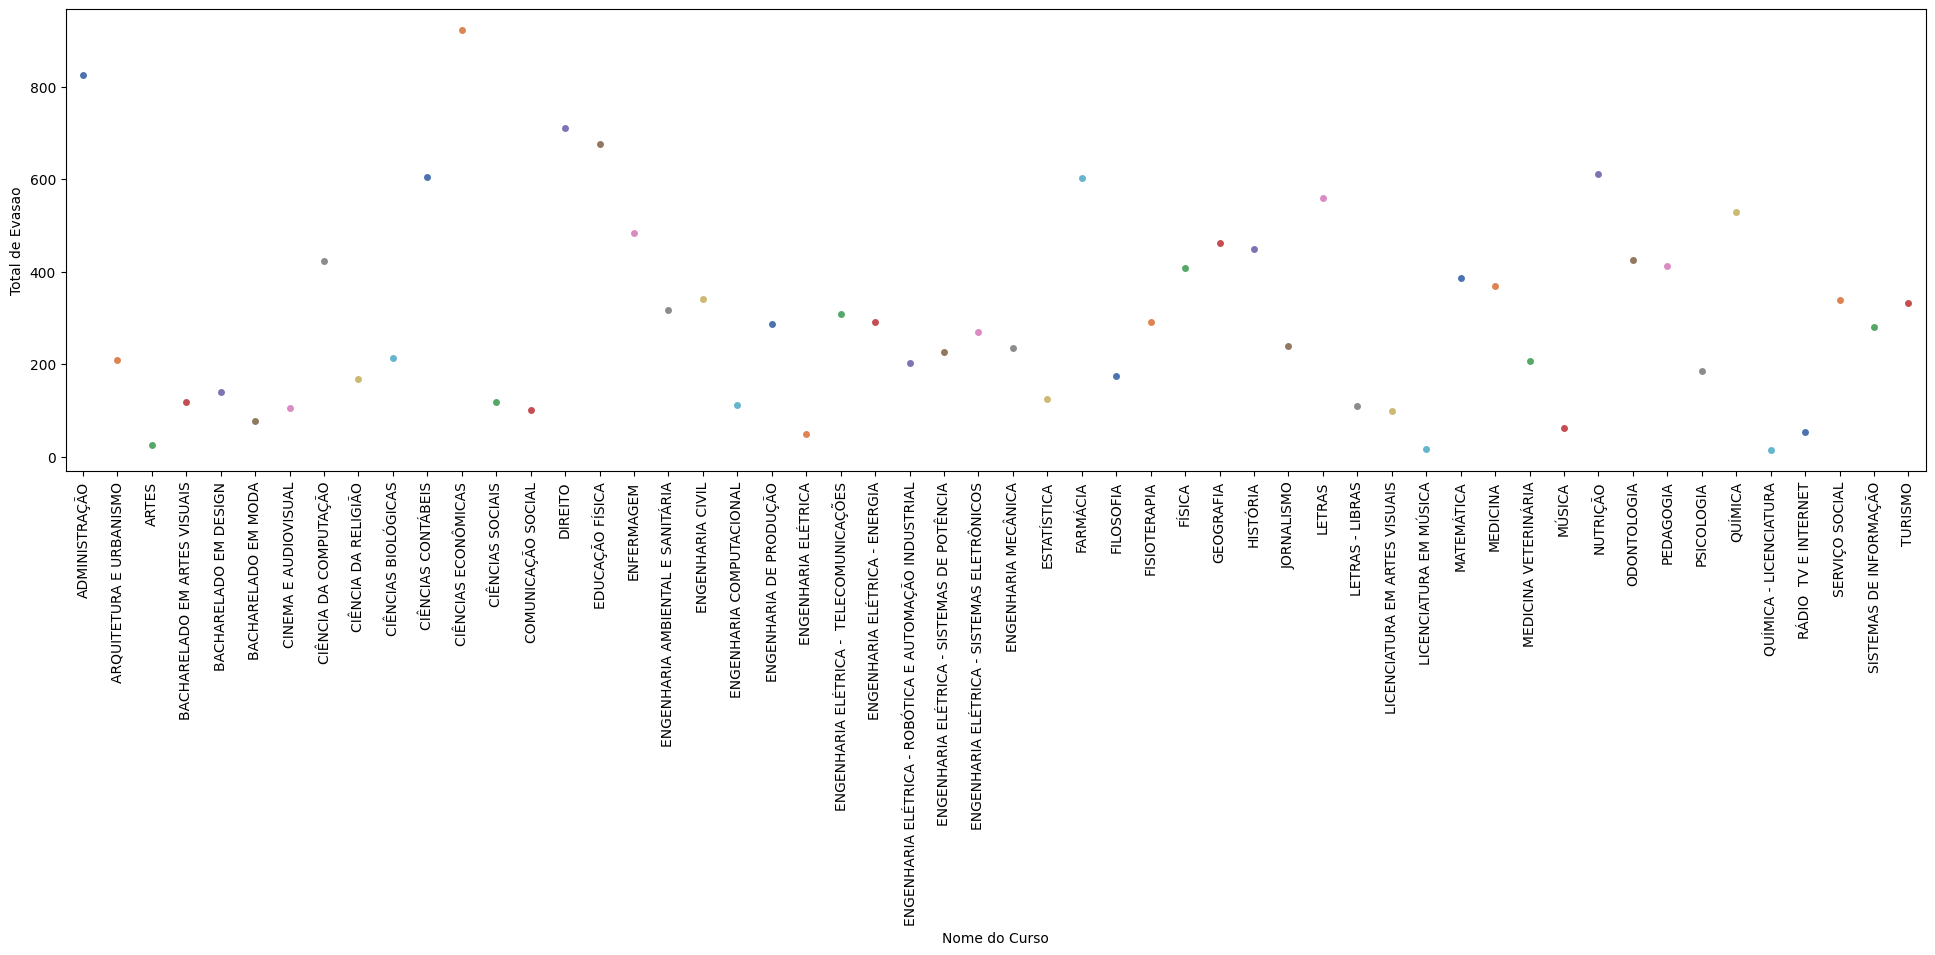

In [29]:
# Crie um swarmplot
plt.figure(figsize=(24, 6))  # Defina o tamanho da figura
sns.swarmplot(data=evadidos_por_curso, x="CURSO_NOME", y="Total de alunos evadidos", palette="deep")

#sns.swarmplot(x='CURSO_NOME', y='Total de alunos evadidos', data=evadidos_por_curso, hue="size", palette="deep")

# Rotacione os rótulos do eixo x para melhor legibilidade, se necessário
plt.xticks(rotation=90)

# Adicione rótulos aos eixos
plt.xlabel('Nome do Curso')
plt.ylabel('Total de Evasao')

# Exiba o gráfico
plt.show()

In [ ]:
X = df_evadidos[['CURSO_NOME', 'ANO_INGRESSO']]  # Variáveis independentes
X = sm.add_constant(X)  # Adicione uma constante (intercepto)
y = df['']  # Variável dependente

model = sm.OLS(y, X).fit()  # Ajuste o modelo

In [36]:
df_filtrado = df_evadidos[df_evadidos['ANO_INGRESSO'] >= 2013]

In [37]:
# Em seguida, agrupe os dados por ano, curso e cota, contando o número de evadidos
df_agregado = df_filtrado.groupby(['ANO_INGRESSO', 'CURSO_NOME', 'COTA']).size().reset_index(name='Número_de_evadidos')

In [38]:
df_agregado

,ANO_INGRESSO,CURSO_NOME,COTA,Número_de_evadidos
0,2013.0,ADMINISTRAÇÃO,Grupo A,14
1,2013.0,ADMINISTRAÇÃO,Grupo B,8
2,2013.0,ADMINISTRAÇÃO,Grupo C,34
3,2013.0,ADMINISTRAÇÃO,Grupo D,8
4,2013.0,ADMINISTRAÇÃO,Grupo E,8
...,...,...,...,...
2213,2023.0,SERVIÇO SOCIAL,Grupo C,3
2214,2023.0,SERVIÇO SOCIAL,Grupo D,1
2215,2023.0,TURISMO,Grupo A,1
2216,2023.0,TURISMO,Grupo C,1
